#**Лабораторная работа 6**
##**Вариант 1: Авиакомпания**

Набор данных содержит опрос об удовлетворенности пассажиров авиакомпании.

Атрибуты:
* Gender – пол пассажиров (женщины, мужчины)
* Customer Туре – тип клиента (лояльный клиент, нелояльный клиент)
* Age – возраст пассажиров
* Type of Travel – цель полета пассажиров (личные поездки, деловые поездки)
* Class – класс обслуживания пассажиров в самолете (Business, Eco, Eco Plus)
* Flight Distance – расстояние полета в рамках данного путешествия
* Inflight wifi service – уровень удовлетворенности услугой Wi–Fi во время по-
лета (0: неприменимо; 1–5)
* Departure/Arrival time convenient – уровень удовлетворенности удобным вре-
менем отправления/прибытия
* Ease of Online booking – уровень удовлетворенности онлайн-бронированием
* Gate location – уровень удовлетворенности местоположением выхода на по-
садку
* Food and drink – уровень удовлетворенности едой и напитками
* Online boarding – уровень удовлетворенности онлайн-посадкой
* Seat comfort – уровень удовлетворенности комфортом сидений
* Inflight entertainment – уровень удовлетворенности развлечениями в полете
* On–board service – уровень удовлетворенности обслуживанием на борту
* Leg room service – уровень удовлетворенности обслуживанием в номерах по-
вышенной комфортности
* Baggage handling – уровень удовлетворенности обработкой багажа
* Check–in service – уровень удовлетворенности обслуживанием на рейс
* Inflight service – уровень удовлетворенности обслуживанием в полете
* Cleanliness – уровень удовлетворенности чистотой
* Departure Delay in Minutes – задержка в минутах при вылете
* Arrival Delay in Minutes – задержка в минутах при прибытии
* Satisfaction – уровень удовлетворенности авиакомпанией (удовлетворен,
нейтральный или неудовлетворен) – целевая переменная

**Цель лабораторной работы:**
научиться решать задачу классификации методами
решающих деревьев и ансамблей на их основе.

**Основные задачи:**
* освоить метод Random Forest (Случайный лес) – алгоритма машинного
обучения, относящегося к классу ансамблевых методов;
* оценить эффективность алгоритма на практическом примере;
* изучение методов визуализации модели и оценки ее корректности.

##1. Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree

##2. Загрузка и первичный анализ данных

In [ ]:
from scipy.special import xlogy
#загружаем набор данных об авиакомпании
data = pd.read_csv('/content/drive/MyDrive/ОмГТУ/3 курс/5 семак/Машинное обучение/2 лр/airline.csv')
data.head()
cut_feat=['Unnamed: 0', 'id']
data.drop(cut_feat, axis=1, inplace=True)
X=data.drop('satisfaction',axis=1)
y=data['satisfaction']


In [ ]:
# посмотрим на данные
print('Размерность признаков: ', X.shape)
print('Названия признаков: ', X.columns.tolist())
print('Размерность целевой переменной: ', y.shape)
print('Уникальные классы: ', y.unique)
print('\nПервые 5 признаков: ')
print(X.head())

Размерность признаков:  (25976, 22)
Названия признаков:  ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Размерность целевой переменной:  (25976,)
Уникальные классы:  <bound method Series.unique of 0                      satisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
25971    neutral or dissatisfied
25972                  satisfied
25973    neutral or dissatisfied
25974                  satisfied
25975    neutral or dissatisfied
Name: satisfaction, Length: 25976, dtype: object>


##3. Заменяем категориальные значения числовыми

In [ ]:
(unique, counts) = np.unique(y, return_counts=True)
print('Unique values of the variable: ', unique)
print('Counts: ', counts)


Unique values of the variable:  ['neutral or dissatisfied' 'satisfied']
Counts:  [14573 11403]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_o = LabelEncoder()
y = labelencoder_o.fit_transform(y)


In [ ]:
(unique, counts) = np.unique(X['Gender'], return_counts=True)
print('Unique values of the variable: ', unique)
print('Counts: ', counts)

Unique values of the variable:  ['Female' 'Male']
Counts:  [13172 12804]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_o = LabelEncoder()
X['Gender'] = labelencoder_o.fit_transform(y)


In [ ]:
(unique, counts) = np.unique(X['Customer Type'], return_counts=True)
print('Unique values of the variable: ', unique)
print('Counts: ', counts)

Unique values of the variable:  ['Loyal Customer' 'disloyal Customer']
Counts:  [21177  4799]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_o = LabelEncoder()
X['Customer Type'] = labelencoder_o.fit_transform(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_o = LabelEncoder()
X['Type of Travel'] = labelencoder_o.fit_transform(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_o = LabelEncoder()
X['Class'] = labelencoder_o.fit_transform(y)

##4. Разделение данных на обучающую и тестовую выборки

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')

Размер обучающей выборки: (20780, 22)
Размер тестовой выборки: (5196, 22)


##5. Создание и обучение модели Random Forest

In [ ]:
#Создаем модель Random Forest
# n_estimators - количество деревьев в лесу
# random_state - для воспроизводимости результатов
rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print('Модель Random Forest обучена!')

Модель Random Forest обучена!


##6. Прогнозирование и оценка модели

In [ ]:
#делаем прогнозы на тестовой выборке
y_pred=rf_model.predict(X_test)

#Оцениваем точность модели
accuracy=accuracy_score(y_test, y_pred)
print(f'Точность модели на тестовой выборке: {accuracy:.4f}')

Точность модели на тестовой выборке: 1.0000


In [ ]:
#Выводим подробный отчет по классификации
target_names=['satisfied', 'neutral or dissatisfied']
print('\n'+'='*50)
print('Отчет по классификации:')
print('='*50)
print(classification_report(y_test,y_pred, target_names=target_names))


Отчет по классификации:
                         precision    recall  f1-score   support

              satisfied       1.00      1.00      1.00      2915
neutral or dissatisfied       1.00      1.00      1.00      2281

               accuracy                           1.00      5196
              macro avg       1.00      1.00      1.00      5196
           weighted avg       1.00      1.00      1.00      5196



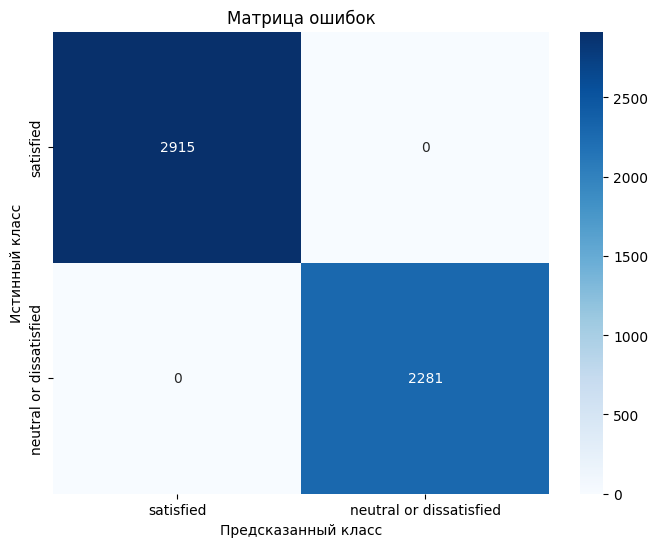

In [ ]:
# строим матрицу ошибкок
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

##7. Анализ важности признаков
Одна из ключевых особенностей Ramdom Forest - возможность оценить важность каждого признака.

In [ ]:
#Важность признаков на основе среднего уменьшения неоднородности (Gini Importance)
feature_importances=rf_model.feature_importances_
features_df=pd.DataFrame({'feature':X.columns, 'importance':feature_importances})
features_df=features_df.sort_values('importance', ascending=False)

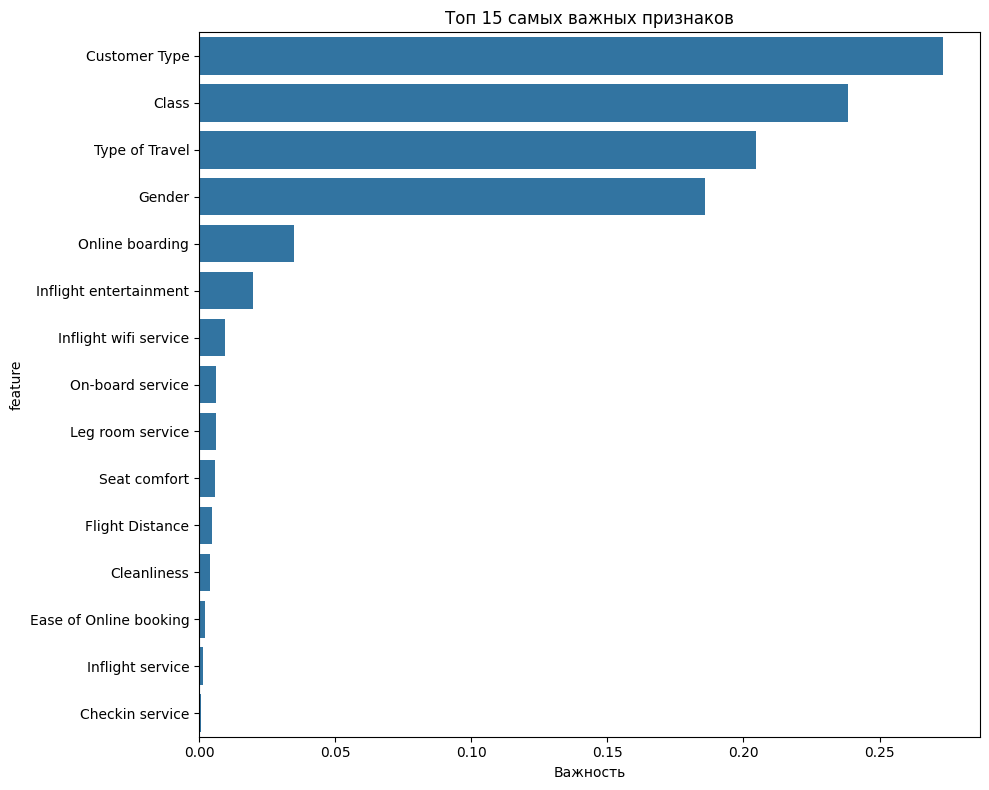

In [ ]:
# Визуализация важности признаков
plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=features_df.head(15))
plt.title('Топ 15 самых важных признаков')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

In [ ]:
# Вывод таблицы с важностью признаков
print('Топ 10 самых важных признаков:')
print(features_df.head(10))

Топ 10 самых важных признаков:
                   feature  importance
1            Customer Type    0.273256
4                    Class    0.238374
3           Type of Travel    0.204738
0                   Gender    0.185914
11         Online boarding    0.034874
13  Inflight entertainment    0.019985
6    Inflight wifi service    0.009538
14        On-board service    0.006303
15        Leg room service    0.006084
12            Seat comfort    0.005705


##8. Подбор гиперпараметров
Для улучшения модели можно подобрать оптимальные гиперпараметры с помощью GridSearchCV

In [ ]:
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [ ]:
#Создаем модель для поиска
rf=RandomForestClassifier(random_state=42)
grid_search=GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

#Запускаем поиск
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
#выводим лучшие параметры
print('Лучшие параметры:', grid_search.best_params_)
print('Лучшая точность при кросс_валидации: {:.4f}'.format(grid_search.best_score_))

Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Лучшая точность при кросс_валидации: 1.0000


In [ ]:
#Оцениваем лучшую модель на  тестовых данных
best_rf_model=grid_search.best_estimator_
y_pred_best=best_rf_model.predict(X_test)
best_accuracy= accuracy_score(y_test, y_pred_best)
print(f'Точность улучшенной модели на тестовой выборке: {best_accuracy:.4f}')

Точность улучшенной модели на тестовой выборке: 1.0000
